In [1]:
#Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

#Para poder cambiar fechas
# ----------------------------------------------------------------------
from datetime import date, datetime
import calendar
import holidays

In [2]:
df= pd.read_pickle('../datos/casual/13_casual-no-norm.pickle')
df.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,casual
0,2018-01-01,invierno,0,1,festivo,1,2,18.18125,80.5833,10.749882,331
1,2018-01-02,invierno,0,1,no festivo,2,2,17.68695,69.6087,16.652113,131
2,2018-01-03,invierno,0,1,no festivo,3,1,9.47025,43.7273,16.636703,120
3,2018-01-04,invierno,0,1,no festivo,4,1,10.60610,59.0435,10.739832,108
4,2018-01-05,invierno,0,1,no festivo,5,1,11.46350,43.6957,12.522300,82


In [3]:
df.dtypes

dteday        datetime64[ns]
season              category
yr                     int64
mnth                   int64
holiday             category
weekday             category
weathersit          category
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
dtype: object

`Para poder codificar las variables categoricas vamos a ir analizando una a una para ver que metodo aplicaremos, segun tenga orden o no.`

---

### SEASON

In [4]:
# Realizamos un groupby que sume los registros de la columna registered por estacion.

estacion = df.groupby('season')['casual'].sum()
estacion= pd.DataFrame(estacion).reset_index()
estacion

,season,casual
0,invierno,60557
1,otoño,129782
2,primavera,203522
3,verano,226091


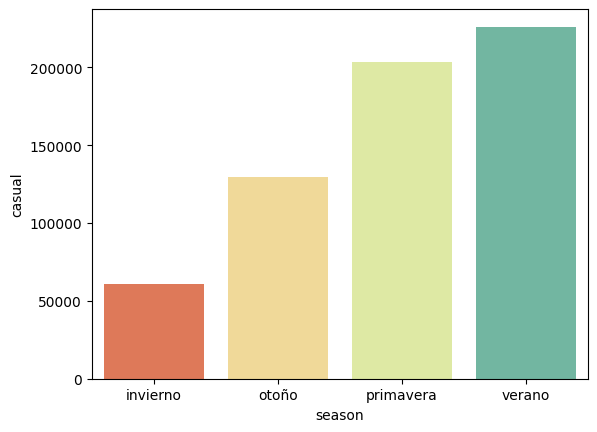

In [5]:
sns.barplot(
        data = estacion,
        x = 'season',
        y = 'casual',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna season TIENE ORDEN, por lo que le daremos menor peso al invierno y mayor al verano`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`


In [6]:
mapa_season = {'invierno':0, 'otoño':1, 'primavera':2, 'verano':3} 

In [7]:
df['season'] = df['season'].map(mapa_season)

---

### HOLIDAY

In [8]:
holiday = df.groupby('holiday')['casual'].sum()
holiday = pd.DataFrame(holiday).reset_index()
holiday

,holiday,casual
0,festivo,28062
1,no festivo,591890


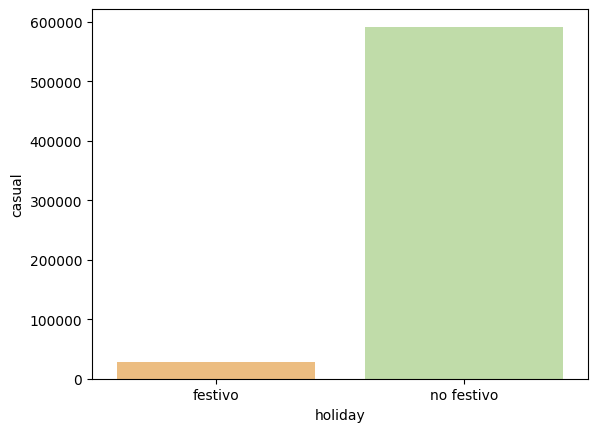

In [9]:
sns.barplot(
        data = holiday,
        x = 'holiday',
        y = 'casual',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna holiday TIENE ORDEN, por lo que le daremos menor peso a festivos y mayor a no festivo`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

# Aumentamos el peso de no festivo con respecto a los registrados, segun vemos el peso en esta gráfica

In [10]:
mapa_holiday = {'festivo':0, 'no festivo':2} 

In [11]:
df['holiday'] = df['holiday'].map(mapa_holiday)

In [12]:
df.sample(2)

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,casual
185,2018-07-05,3,0,7,2,4,1,34.81690,59.0417,8.459286,1031
461,2019-04-07,2,1,4,2,7,1,21.30645,25.4167,18.416357,3252


---

## WEEKDAY

In [13]:
semana = df.groupby('weekday')['casual'].sum()
semana = pd.DataFrame(semana).reset_index()
semana

,weekday,casual
0,1,141191
1,2,100781
2,3,65429
3,4,60750
4,5,59665
5,6,70954
6,7,121182


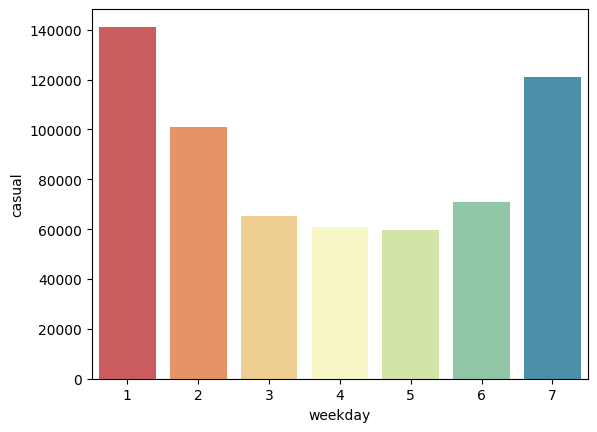

In [14]:
sns.barplot(
        data = semana,
        x = 'weekday',
        y = 'casual',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna weekday TIENE ORDEN, por lo que le daremos menor peso a 1(Lunes) y 7(Domingo) y mayor a 4(Jueves) y 5(Viernes).`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

# Cambiamos el peso de los dias de la semana con respecto a registrados

In [15]:
mapa_weekday = { 1:3,
                2:1, 
                3:0,
                4:0, 
                5:0,
                6:0,
                7:2}

In [45]:
df['weekday'] = df['weekday'].map(mapa_weekday)

---

## WEATHERSIT

In [16]:
clima = df.groupby('weathersit')['casual'].sum()
clima = pd.DataFrame(clima).reset_index()
clima

,weathersit,casual
0,1,446346
1,2,169711
2,3,3895


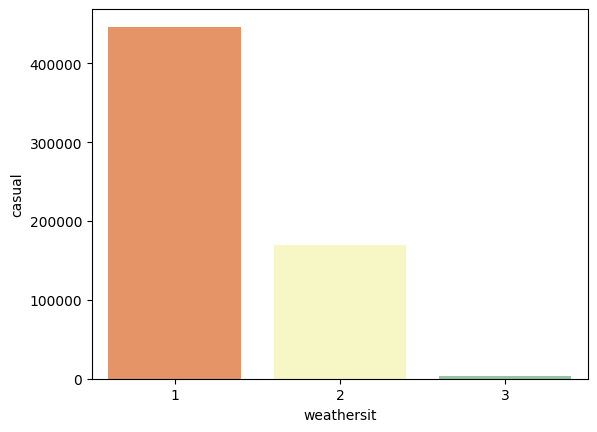

In [17]:
sns.barplot(
        data = clima,
        x = 'weathersit',
        y = 'casual',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna weathersit TIENE ORDEN, por lo que le daremos menor peso a 3  y mayor 1.`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

In [18]:
mapa_weather = {3:0, 2:1, 1:2}

In [19]:
df['weathersit'] = df['weathersit'].map(mapa_weather)

---

In [20]:
df.sample(2)

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,casual
19,2018-01-20,0,0,1,2,6,1,12.75250,53.8333,13.125568,83
505,2019-05-21,2,1,5,2,2,1,28.28335,81.1250,15.624668,630


# MONTH

In [21]:
month = df.groupby('mnth')['casual'].sum()
month= pd.DataFrame(month).reset_index()
month

,mnth,casual
0,1,12042
1,2,14898
2,3,44444
3,4,60802
4,5,75285
5,6,73906
6,7,78157
7,8,72039
8,9,70323
9,10,59760


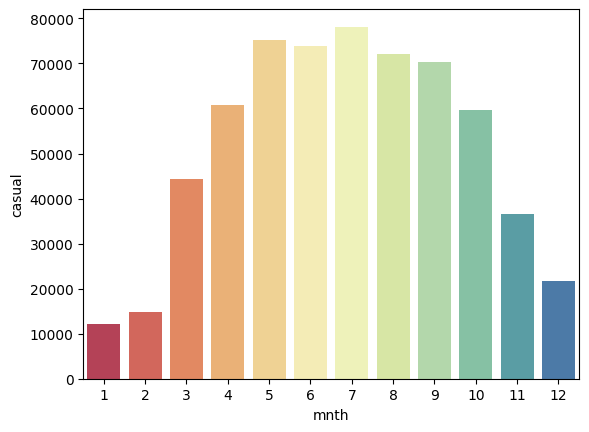

In [22]:
sns.barplot(
        data = month,
        x = 'mnth',
        y = 'casual',
        #alpha = 0.2,
        palette = 'Spectral');

In [23]:
mapa_mes = {1:0, 2:0, 3:1, 4:2, 5:3, 6:3, 7:3, 8:3, 9:3, 10:2, 11:1, 12:0}

In [24]:
df['mnth'] = df['mnth'].map(mapa_mes)

In [25]:
df.head(2)

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,casual
0,2018-01-01,0,0,0,0,1,1,18.18125,80.5833,10.749882,331
1,2018-01-02,0,0,0,2,2,1,17.68695,69.6087,16.652113,131


In [26]:
df.mnth.unique()

array([0, 1, 2, 3])

In [53]:
'''def one_hot_encoder_one(df,columna,keep_first=True):
    
    # iniciamos el método de OneHot Encoder
    oh = OneHotEncoder()
    
    # hacemos la codificación de los datos para la variable dada 
    transformados = oh.fit_transform(df[[columna]])
    
    # convertimos nuestro array con la codificación hecha en un dataframe
    oh_df = pd.DataFrame(transformados.toarray())
    
    # el método get_feature_names nos va a dar el nombre de las columnas nuevas que se nos generarán
    oh_df.columns = oh.get_feature_names_out()
    
    # concatenamos el dataframe original con el dataframe que acabamos de crear
    final = pd.concat([df,oh_df],axis=1)
    
    # eliminamos la columna original 
    final.drop(columna, axis = 1,  inplace = True)
    return final'''

In [54]:
#df = one_hot_encoder_one(df, "mnth")

In [27]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,casual
0,2018-01-01,0,0,0,0,1,1,18.18125,80.5833,10.749882,331
1,2018-01-02,0,0,0,2,2,1,17.68695,69.6087,16.652113,131
2,2018-01-03,0,0,0,2,3,2,9.47025,43.7273,16.636703,120
3,2018-01-04,0,0,0,2,4,2,10.60610,59.0435,10.739832,108
4,2018-01-05,0,0,0,2,5,2,11.46350,43.6957,12.522300,82


In [28]:
df.to_pickle('../datos/casual/14-casual_encoding.pickle')

In [29]:
df.to_csv('../datos/casual/14-casual_encoding.csv')